In [5]:
import pandas as pd


In [6]:
## clustering - to classify Customers with credit card purchase
Customer_Segments = pd.read_csv("Customer segment dataset (1).csv") 


In [7]:
Customer_Segments

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CREDIT_LIMIT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.166667,0.083333,1000.0,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,0.000000,0.000000,7000.0,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,1.000000,0.000000,7500.0,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,0.083333,0.000000,7500.0,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.083333,0.000000,1200.0,12
...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,1.000000,0.833333,1000.0,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,1.000000,0.833333,1000.0,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.833333,0.666667,1000.0,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,0.000000,0.000000,500.0,6


In [9]:
#choose the variables
#lets Balance,Bal Freq,Pruchases,one_offPurchse,Ins Purchase
#subsetting

Customer_Segments_Subset = Customer_Segments.iloc[:,1:6]


In [10]:
Customer_Segments_Subset

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES
0,40.900749,0.818182,95.40,0.00,95.40
1,3202.467416,0.909091,0.00,0.00,0.00
2,2495.148862,1.000000,773.17,773.17,0.00
3,1666.670542,0.636364,1499.00,1499.00,0.00
4,817.714335,1.000000,16.00,16.00,0.00
...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.00,291.12
8946,19.183215,1.000000,300.00,0.00,300.00
8947,23.398673,0.833333,144.40,0.00,144.40
8948,13.457564,0.833333,0.00,0.00,0.00


In [11]:
#Drop NaN and reset index

Customer_Segments_Subset = Customer_Segments_Subset.dropna().reset_index(drop=True)

In [12]:
len(Customer_Segments_Subset)

8950

In [13]:
Customer_Segments_Subset

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES
0,40.900749,0.818182,95.40,0.00,95.40
1,3202.467416,0.909091,0.00,0.00,0.00
2,2495.148862,1.000000,773.17,773.17,0.00
3,1666.670542,0.636364,1499.00,1499.00,0.00
4,817.714335,1.000000,16.00,16.00,0.00
...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.00,291.12
8946,19.183215,1.000000,300.00,0.00,300.00
8947,23.398673,0.833333,144.40,0.00,144.40
8948,13.457564,0.833333,0.00,0.00,0.00


In [14]:
#Running Kmeans cluster

from sklearn.cluster import KMeans
#define an object that takes number of cluster you want
kmeansFunction = KMeans(n_clusters=3)
Cus_Kmeans = kmeansFunction.fit(Customer_Segments_Subset)
Cus_Kmeans.labels_

array([2, 2, 2, ..., 2, 2, 2])

In [15]:
import numpy as np
np.unique(Cus_Kmeans.labels_)

array([0, 1, 2])

In [16]:
 #Step 4 - Appending cluster number to original data
# converting to data frame with a column name
ClNum = pd.DataFrame(Cus_Kmeans.labels_, columns=['ClusterNumber'])
ClNum
# gives unique number of clusters. Cluster number is starting 0
np.unique(ClNum['ClusterNumber'])
# concatenating clusters variable with Movie data
Final_Cus_Seg = pd.concat([Customer_Segments_Subset,ClNum],axis=1)
Final_Cus_Seg

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,ClusterNumber
0,40.900749,0.818182,95.40,0.00,95.40,2
1,3202.467416,0.909091,0.00,0.00,0.00,2
2,2495.148862,1.000000,773.17,773.17,0.00,2
3,1666.670542,0.636364,1499.00,1499.00,0.00,2
4,817.714335,1.000000,16.00,16.00,0.00,2
...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.00,291.12,2
8946,19.183215,1.000000,300.00,0.00,300.00,2
8947,23.398673,0.833333,144.40,0.00,144.40,2
8948,13.457564,0.833333,0.00,0.00,0.00,2


In [17]:
# Important from project perspective
Final_Cus_Seg.groupby('ClusterNumber').agg({'BALANCE':['count','mean'],'BALANCE_FREQUENCY':['mean'],'PURCHASES':['mean'],'ONEOFF_PURCHASES':['mean'],'INSTALLMENTS_PURCHASES':['mean']})

BALANCE              BALANCE_FREQUENCY     PURCHASES  \
                count         mean              mean          mean   
ClusterNumber                                                        
0                1276  5581.530208          0.990476   1143.798276   
1                 161  3646.299495          0.979404  12113.654410   
2                7513   837.609869          0.855855    741.234966   

              ONEOFF_PURCHASES INSTALLMENTS_PURCHASES  
                          mean                   mean  
ClusterNumber                                          
0                   666.545078             477.305666  
1                  8774.134224            3339.520186  
2                   404.521142             337.062510

In [33]:
import seaborn as sns
sns.set_style('whitegrid')
sns.lmplot('BALANCE','BALANCE_FREQUENCY','PURCHASES','ONEOFF_PURCHASES','INSTALLMENTS_PURCHASES',data=Final_Cus_Seg[ClusterNumber],hue='ClusterNumber',palette='coolwarm',fit_reg=False)


NameError: name 'ClusterNumber' is not defined

In [36]:
Final_data =Final_Cus_Seg.ClusterNumber

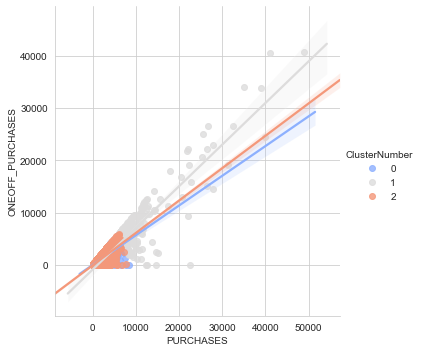

In [40]:
import seaborn as sns
sns.set_style('whitegrid')
sns.lmplot('PURCHASES','ONEOFF_PURCHASES',data=Final_Cus_Seg,hue='ClusterNumber',palette='coolwarm',fit_reg=True)

In [37]:
help(sns.lmplot)

Help on function lmplot in module seaborn.regression:

lmplot(x, y, data, hue=None, col=None, row=None, palette=None, col_wrap=None, height=5, aspect=1, markers='o', sharex=True, sharey=True, hue_order=None, col_order=None, row_order=None, legend=True, legend_out=True, x_estimator=None, x_bins=None, x_ci='ci', scatter=True, fit_reg=True, ci=95, n_boot=1000, units=None, order=1, logistic=False, lowess=False, robust=False, logx=False, x_partial=None, y_partial=None, truncate=False, x_jitter=None, y_jitter=None, scatter_kws=None, line_kws=None, size=None)
    Plot data and regression model fits across a FacetGrid.
    
    This function combines :func:`regplot` and :class:`FacetGrid`. It is
    intended as a convenient interface to fit regression models across
    conditional subsets of a dataset.
    
    When thinking about how to assign variables to different facets, a general
    rule is that it makes sense to use ``hue`` for the most important
    comparison, followed by ``col`` and 

In [ ]:
#Insights 

#CLuster 2: Majority of customers belong to this cluster.Customers who have low purchaes and they prefer Oneoff payments
#So bank could bring up a marketing strategy where they could offer these customers schemes of Installment payments  